# Projekt Eksploracji
### Michał Podolec

## Wstęp: Import i przekształcanie danych

### Wczytanie danych z pliku .csv

In [52]:
import pandas as pd
import numpy as np

d = pd.read_csv('HiED_eksploracja_26.csv')
d.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0  3.727890  3.727890 -3.489029 -3.489029 -4.374913 -1.697261   
1           1  1.305639       NaN -1.337678 -1.337678 -4.267004 -2.029218   
2           2  0.080473  0.080473 -0.021093       NaN  0.087026  0.294830   
3           3  1.421829  1.421829  2.000774  2.000774  1.475646 -0.422832   
4           4 -4.654744 -4.654744 -5.389263 -5.389263 -5.805720 -0.025020   

          6         7         8  klasa  
0 -3.340340       NaN -2.202619      1  
1 -2.454895  4.668916 -3.820831      1  
2  2.697350 -3.003492 -0.887141      0  
3  2.267901  0.991945 -2.610357      0  
4 -4.958819  3.608714  3.716522      5

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  230 non-null    int64  
 1   0           218 non-null    float64
 2   1           220 non-null    float64
 3   2           222 non-null    float64
 4   3           218 non-null    float64
 5   4           225 non-null    float64
 6   5           222 non-null    float64
 7   6           219 non-null    float64
 8   7           223 non-null    float64
 9   8           220 non-null    float64
 10  klasa       230 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 19.9 KB


## 1. Wstępna analiza zbioru danych

In [26]:
d.describe()

Unnamed: 0           0           1           2           3           4  \
count  230.000000  218.000000  220.000000  222.000000  218.000000  225.000000   
mean   114.500000   -0.069608   -0.016487   -0.007546    0.018659   -1.641011   
std     66.539462    3.267416    3.308327    3.206314    3.204696    4.688892   
min      0.000000   -5.143208   -5.143208   -5.772597   -5.772597   -9.187591   
25%     57.250000   -3.116996   -3.072354   -2.882567   -2.873419   -5.551176   
50%    114.500000   -0.292286   -0.438893    0.043273    0.170535   -2.544866   
75%    171.750000    2.917684    2.985629    2.786500    2.786500    3.123557   
max    229.000000    5.682350    6.262182    6.982502    6.982502    8.710430   

                5           6           7           8       klasa  
count  222.000000  219.000000  223.000000  220.000000  230.000000  
mean    -0.040240   -2.126799    1.955245   -0.971042    2.482609  
std      1.022826    2.574314    2.600536    3.116731    1.714860  
min     -2.521316   -6.671241   -5.499243   -5.998411    0.000000  
25%     -0.676269   -3.659980    1.329464   -3.280351    1.000000  
50%      0.015111   -2.715444    2.764080   -2.408897    2.000000  
75%      0.600970   -1.451176    3.615692    2.443416    4.000000  
max      2.644632    4.104896    6.224215    5.833186    5.000000

Jak widać występują obiekty z brakami w danych, zbadam liczbę obiektów, w których występuje choć jeden brak

In [27]:
num_rows_with_missing = d.isnull().any(axis=1).sum()
print("Liczba obiektów z co najmniej jednym brakiem:", num_rows_with_missing)

Liczba obiektów z co najmniej jednym brakiem: 74


Jest to duża liczba, bo stanowi 74/230 obiektów w zbiorze danych, jest to za duża liczba, aby można było mówić o usunięciu wszystkich obiektów z brakiem w danych. Można zauważyć, że w danych nie występują braki w atrybucie 'klasa'. Możemy wykorzystać to do uzupełnienia brakujących danych w oparciu o wartości reszty obiektów w obrębie tej samej klasy.

Metoda uzupełniająca brakujące dane medianą wartości danego atrybutu w obrębie tej samej klasy

In [28]:
d_filled = d.copy()
for col in d.columns:
    if col != "klasa" and d[col].isnull().any():
        d_filled[col] = d.groupby("klasa")[col].transform(
            lambda x: x.fillna(x.median())
        )
d_filled.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
klasa         0
dtype: int64

In [29]:
d_filled.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0  3.727890  3.727890 -3.489029 -3.489029 -4.374913 -1.697261   
1           1  1.305639  2.790315 -1.337678 -1.337678 -4.267004 -2.029218   
2           2  0.080473  0.080473 -0.021093  2.299493  0.087026  0.294830   
3           3  1.421829  1.421829  2.000774  2.000774  1.475646 -0.422832   
4           4 -4.654744 -4.654744 -5.389263 -5.389263 -5.805720 -0.025020   

          6         7         8  klasa  
0 -3.340340  3.372708 -2.202619      1  
1 -2.454895  4.668916 -3.820831      1  
2  2.697350 -3.003492 -0.887141      0  
3  2.267901  0.991945 -2.610357      0  
4 -4.958819  3.608714  3.716522      5

In [30]:
num_rows_with_missing = d_filled.isnull().any(axis=1).sum()
print("Liczba obiektów z co najmniej jednym brakiem:", num_rows_with_missing)

Liczba obiektów z co najmniej jednym brakiem: 0


Teraz możemy poddać dane dalszej analizie

In [31]:
d_filled.describe()

Unnamed: 0           0           1           2           3           4  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean   114.500000   -0.015794    0.063326   -0.061919   -0.011365   -1.560998   
std     66.539462    3.257100    3.298720    3.193193    3.192297    4.699196   
min      0.000000   -5.143208   -5.143208   -5.772597   -5.772597   -9.187591   
25%     57.250000   -3.116996   -3.040614   -2.913975   -2.945794   -5.256225   
50%    114.500000    0.013765    0.013765   -0.212999    0.035285   -2.455527   
75%    171.750000    2.917684    2.973213    2.684941    2.786500    3.227310   
max    229.000000    5.682350    6.262182    6.982502    6.982502    8.710430   

                5           6           7           8       klasa  
count  230.000000  230.000000  230.000000  230.000000  230.000000  
mean    -0.036805   -2.065672    1.966345   -0.946576    2.482609  
std      1.005526    2.610957    2.589103    3.113799    1.714860  
min     -2.521316   -6.671241   -5.499243   -5.998411    0.000000  
25%     -0.665598   -3.614677    1.393009   -3.236987    1.000000  
50%     -0.000162   -2.728197    2.797314   -2.422605    2.000000  
75%      0.564077   -1.426754    3.608607    2.562395    4.000000  
max      2.644632    4.104896    6.224215    5.833186    5.000000

Od razu możemy pozbyć się kolumny 'Unnamed' ponieważ zawiera ona numer id obiektu, więc nie będzie istotna podczas analizy.

In [32]:
d_filled = d_filled.drop(columns=["Unnamed: 0"])

## Podstawowe dane zbioru

Przedstawiam liczbę obiektów, liczbę atrybutów oraz nazwę kolumn

In [33]:
print("Liczba obiektów:", d_filled.shape[0])
print("Liczba atrybutów:", d_filled.shape[1])
print("Nazwy kolumn:", d_filled.columns.tolist())

Liczba obiektów: 230
Liczba atrybutów: 10
Nazwy kolumn: ['0', '1', '2', '3', '4', '5', '6', '7', '8', 'klasa']


## Analiza reprezentacji poszczególnych klas

In [34]:
num_classes = d_filled["klasa"].nunique()
class_distribution = d_filled["klasa"].value_counts().sort_index()
print("Liczba klas:", num_classes)
print("Rozkład klas:\n", class_distribution)

Liczba klas: 6
Rozkład klas:
 klasa
0    39
1    39
2    38
3    38
4    38
5    38
Name: count, dtype: int64


Widać, że w zbiorze danych występuje wyrównana reprezentacja każdej z klasy, co jest bardzo porządanym zjawiskiem w przypadku tworzenia na danym zbiorze klasyfikatora.

## Analiza atrybutów całego zbioru

Następnie przedstawiam analizę poszczególnych atrybutów w całym zbiorze. Atrybut klasyfikujący nie zostaje uwzględniony z powodu na swoją kategoryczną naturę.

In [35]:
d_filled.drop(columns=["klasa"]).describe()

0           1           2           3           4           5  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean    -0.015794    0.063326   -0.061919   -0.011365   -1.560998   -0.036805   
std      3.257100    3.298720    3.193193    3.192297    4.699196    1.005526   
min     -5.143208   -5.143208   -5.772597   -5.772597   -9.187591   -2.521316   
25%     -3.116996   -3.040614   -2.913975   -2.945794   -5.256225   -0.665598   
50%      0.013765    0.013765   -0.212999    0.035285   -2.455527   -0.000162   
75%      2.917684    2.973213    2.684941    2.786500    3.227310    0.564077   
max      5.682350    6.262182    6.982502    6.982502    8.710430    2.644632   

                6           7           8  
count  230.000000  230.000000  230.000000  
mean    -2.065672    1.966345   -0.946576  
std      2.610957    2.589103    3.113799  
min     -6.671241   -5.499243   -5.998411  
25%     -3.614677    1.393009   -3.236987  
50%     -2.728197    2.797314   -2.422605  
75%     -1.426754    3.608607    2.562395  
max      4.104896    6.224215    5.833186

## Analiza atrybutów ze względu na klasy obiektów

In [36]:
for klasa in sorted(d_filled["klasa"].unique()):
    print(f"Analiza wartości atrybutów dla klasy {klasa}:")
    display(d_filled[d_filled["klasa"] == klasa].describe())

Analiza wartości atrybutów dla klasy 0:


0          1          2          3          4          5  \
count  39.000000  39.000000  39.000000  39.000000  39.000000  39.000000   
mean    3.351798   3.433198   2.580740   2.640437   3.391296   0.156008   
std     1.590006   1.627778   1.540801   1.481294   1.399901   0.863130   
min    -0.147722  -0.147722  -0.021093   0.107640   0.087026  -1.979862   
25%     2.598399   2.598399   1.620642   1.811723   2.525711  -0.171849   
50%     3.606891   3.840294   2.291890   2.299493   3.526664   0.288793   
75%     4.420556   4.583049   3.342271   3.342271   4.222442   0.548600   
max     5.554321   5.554321   5.839635   5.839635   7.016397   1.926748   

               6          7          8  klasa  
count  39.000000  39.000000  39.000000   39.0  
mean    3.032659   3.041868  -2.915322    0.0  
std     0.569948   1.728931   0.585909    0.0  
min     1.861219  -3.003492  -4.104762    0.0  
25%     2.659662   2.255094  -3.208300    0.0  
50%     3.108923   3.099670  -2.962995    0.0  
75%     3.433573   4.255427  -2.560303    0.0  
max     4.104896   6.224215  -0.887141    0.0

Analiza wartości atrybutów dla klasy 1:


0          1          2          3          4          5  \
count  39.000000  39.000000  39.000000  39.000000  39.000000  39.000000   
mean    2.667740   2.921680  -2.753697  -2.751598  -4.509664  -0.073109   
std     1.231951   1.229837   0.940346   0.928558   1.545086   1.096682   
min     0.365813   0.677002  -4.451340  -4.451340  -7.792420  -2.443680   
25%     1.928193   2.275910  -3.485475  -3.487597  -5.418293  -0.576241   
50%     2.566582   2.790315  -2.779126  -2.779126  -4.393174  -0.116603   
75%     3.487099   3.697936  -2.196865  -2.196865  -3.601674   0.432580   
max     4.881938   6.262182  -0.679945  -0.679945  -1.673479   2.081939   

               6          7          8  klasa  
count  39.000000  39.000000  39.000000   39.0  
mean   -2.873467   3.228591  -2.872132    1.0  
std     1.004063   1.169156   1.557004    0.0  
min    -5.728933   0.321806  -5.998411    1.0  
25%    -3.384821   2.627104  -3.650798    1.0  
50%    -2.879305   3.372708  -2.835353    1.0  
75%    -2.412934   3.941500  -1.946529    1.0  
max    -0.821019   5.863128   0.568882    1.0

Analiza wartości atrybutów dla klasy 2:


0          1          2          3          4          5  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean   -3.017192  -2.969990   2.641852   2.662414  -2.891517  -0.017363   
std     1.137286   1.088418   1.231172   1.238414   2.024737   1.050609   
min    -5.143208  -5.143208   0.301912   0.301912  -6.343891  -2.212844   
25%    -3.616073  -3.591943   2.095322   2.095322  -4.178288  -0.689718   
50%    -3.222125  -3.218593   2.684941   2.761865  -3.258966   0.035748   
75%    -2.504478  -2.504478   3.331391   3.375168  -2.099676   0.649823   
max    -0.052943  -0.052943   5.347315   5.347315   3.079991   2.541733   

               6          7          8  klasa  
count  38.000000  38.000000  38.000000   38.0  
mean   -3.405246   3.054442  -3.110833    2.0  
std     1.570436   1.313069   1.225834    0.0  
min    -6.671241  -0.413249  -5.444830    2.0  
25%    -4.467493   2.353621  -3.788807    2.0  
50%    -3.205786   2.902091  -3.082725    2.0  
75%    -2.423666   3.817299  -2.182236    2.0  
max    -0.225079   5.983346  -0.441904    2.0

Analiza wartości atrybutów dla klasy 3:


0          1          2          3          4          5  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean   -2.983849  -2.906161  -3.050806  -3.014115  -7.666148  -0.116054   
std     1.200010   1.229064   1.355381   1.463200   0.755301   1.147520   
min    -4.966955  -4.966955  -5.724506  -5.724506  -9.187591  -2.198555   
25%    -3.899611  -3.899611  -4.133216  -4.267543  -8.214060  -0.798813   
50%    -3.118752  -3.049104  -3.097940  -3.036565  -7.542197  -0.093140   
75%    -2.259246  -2.251696  -2.061462  -1.895509  -7.092118   0.708449   
max    -0.436849  -0.436849  -0.037070  -0.037070  -6.275708   1.979807   

               6          7          8  klasa  
count  38.000000  38.000000  38.000000   38.0  
mean   -2.822697   2.943894  -3.042928    3.0  
std     1.387400   0.605607   0.917592    0.0  
min    -5.483363   1.659151  -4.762326    3.0  
25%    -3.894738   2.460454  -3.707637    3.0  
50%    -2.850253   3.089915  -3.008929    3.0  
75%    -1.563668   3.346737  -2.506619    3.0  
max    -0.123825   4.047821  -1.374966    3.0

Analiza wartości atrybutów dla klasy 4:


0          1          2          3          4          5  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean    2.748682   2.787729   3.061225   3.254623   4.789824  -0.102161   
std     1.552222   1.552026   1.972089   1.498456   2.226647   0.981657   
min    -4.276047  -4.276047  -4.623915  -0.472254  -5.233678  -2.085665   
25%     2.136084   2.155237   2.256647   2.316726   4.113538  -0.676269   
50%     2.700634   2.802137   3.281852   3.237438   5.001983  -0.047668   
75%     3.714306   3.714306   4.428479   4.428479   6.180706   0.393873   
max     5.682350   5.682350   6.982502   6.982502   8.710430   2.644632   

               6          7          8  klasa  
count  38.000000  38.000000  38.000000   38.0  
mean   -2.862739  -2.977763   3.053215    4.0  
std     1.256989   1.412884   1.435992    0.0  
min    -5.498913  -5.499243   0.181672    4.0  
25%    -3.625319  -3.715026   1.924276    4.0  
50%    -2.698374  -2.970120   3.272354    4.0  
75%    -2.109016  -2.292023   4.103978    4.0  
max     0.573844   3.305424   5.833186    4.0

Analiza wartości atrybutów dla klasy 5:


0          1          2          3          4          5  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean   -3.021182  -3.050398  -2.849532  -2.857622  -2.532503  -0.072267   
std     1.179955   1.140817   1.685184   1.675998   2.252485   0.905600   
min    -5.018272  -5.018272  -5.772597  -5.772597  -6.612364  -2.521316   
25%    -3.706648  -3.706648  -3.627264  -3.554720  -3.998803  -0.654414   
50%    -3.023517  -3.023517  -3.009542  -3.035146  -2.403921  -0.049358   
75%    -2.498014  -2.498014  -2.074299  -2.074299  -1.512895   0.649326   
max     1.156509   1.156509   3.617261   3.617261   5.064461   1.539588   

               6          7          8  klasa  
count  38.000000  38.000000  38.000000   38.0  
mean   -3.575453   2.445518   3.311027    5.0  
std     1.158121   1.578360   0.627843    0.0  
min    -6.410727  -1.368636   2.133464    5.0  
25%    -4.381489   1.656217   2.909628    5.0  
50%    -3.614677   2.507372   3.239538    5.0  
75%    -2.748765   3.596159   3.707722    5.0  
max    -1.185597   5.925155   4.639772    5.0

# Odchylenia standardowe

### Korzystając z wcześniejszych DataFrame-ów badam wartości odchyleń standardowych dla całego zbioru.

In [37]:
d_filled.drop(columns=["klasa"]).std()

0    3.257100
1    3.298720
2    3.193193
3    3.192297
4    4.699196
5    1.005526
6    2.610957
7    2.589103
8    3.113799
dtype: float64

In [38]:
std = d_filled.drop(columns=["klasa"]).std()

# Maksymalna wartość std i jej kolumna
max_std_value = std.max()
max_std_column = std.idxmax()

# Minimalna wartość std i jej kolumna
min_std_value = std.min()
min_std_column = std.idxmin()

print("Największe std:", max_std_value, "w kolumnie:", max_std_column)
print("Najmniejsze std:", min_std_value, "w kolumnie:", min_std_column)

Największe std: 4.69919594075893 w kolumnie: 4
Najmniejsze std: 1.0055259890605366 w kolumnie: 5


Wynika z tego, że atrybut o największym odchyleniu standardowym to atrybut 4.
Natomiast atrybut o najmniejszym odchyleniu standardowym to atrybut 5.

### Poniżej przedstawiam wartość odchylenia standardowego dla danych atrybutów w poszczególnych klasach

In [39]:
grouped_stats = d_filled.groupby("klasa").std()
grouped_stats

0         1         2         3         4         5         6  \
klasa                                                                         
0      1.590006  1.627778  1.540801  1.481294  1.399901  0.863130  0.569948   
1      1.231951  1.229837  0.940346  0.928558  1.545086  1.096682  1.004063   
2      1.137286  1.088418  1.231172  1.238414  2.024737  1.050609  1.570436   
3      1.200010  1.229064  1.355381  1.463200  0.755301  1.147520  1.387400   
4      1.552222  1.552026  1.972089  1.498456  2.226647  0.981657  1.256989   
5      1.179955  1.140817  1.685184  1.675998  2.252485  0.905600  1.158121   

              7         8  
klasa                      
0      1.728931  0.585909  
1      1.169156  1.557004  
2      1.313069  1.225834  
3      0.605607  0.917592  
4      1.412884  1.435992  
5      1.578360  0.627843

In [40]:
for klasa in grouped_stats.index:
    stds = grouped_stats.loc[klasa]
    max_col = stds.idxmax()
    max_val = stds.max()
    min_col = stds.idxmin()
    min_val = stds.min()

    print(f"Klasa {klasa}:")
    print(f"Największe std: {max_val:.4f} dla atrybutu '{max_col}'")
    print(f"Najmniejsze std: {min_val:.4f} dla atrybutu '{min_col}'\n")

Klasa 0:
Największe std: 1.7289 dla atrybutu '7'
Najmniejsze std: 0.5699 dla atrybutu '6'

Klasa 1:
Największe std: 1.5570 dla atrybutu '8'
Najmniejsze std: 0.9286 dla atrybutu '3'

Klasa 2:
Największe std: 2.0247 dla atrybutu '4'
Najmniejsze std: 1.0506 dla atrybutu '5'

Klasa 3:
Największe std: 1.4632 dla atrybutu '3'
Najmniejsze std: 0.6056 dla atrybutu '7'

Klasa 4:
Największe std: 2.2266 dla atrybutu '4'
Najmniejsze std: 0.9817 dla atrybutu '5'

Klasa 5:
Największe std: 2.2525 dla atrybutu '4'
Najmniejsze std: 0.6278 dla atrybutu '8'



Powyżej widać jakie atrybuty poszczególnych klas obiektów mają największe i najmniejsze wartości odchyleń standardowych.

## Rozstępy

Wartości rozstępów ('range') poszczególnych atrybutów dla całego zbioru

In [41]:
ranges = d_filled.drop(columns=["klasa"]).agg(["min", "max"])
ranges.loc["range"] = ranges.loc["max"] - ranges.loc["min"]
ranges.T

min       max      range
0 -5.143208  5.682350  10.825558
1 -5.143208  6.262182  11.405390
2 -5.772597  6.982502  12.755099
3 -5.772597  6.982502  12.755099
4 -9.187591  8.710430  17.898020
5 -2.521316  2.644632   5.165948
6 -6.671241  4.104896  10.776137
7 -5.499243  6.224215  11.723458
8 -5.998411  5.833186  11.831597

In [42]:
range_values = ranges.T["range"]

max_range = range_values.max()
max_range_attr = range_values.idxmax()

min_range = range_values.min()
min_range_attr = range_values.idxmin()

print(f"Największy rozstęp: {max_range:.4f} dla atrybutu '{max_range_attr}'")
print(f"Najmniejszy rozstęp: {min_range:.4f} dla atrybutu '{min_range_attr}'")

Największy rozstęp: 17.8980 dla atrybutu '4'
Najmniejszy rozstęp: 5.1659 dla atrybutu '5'


Wartości rozstępów dla poszczególnych atrybutów dla danych klas obiektów

In [43]:
min_vals = d_filled.groupby("klasa").min()
max_vals = d_filled.groupby("klasa").max()

# Obliczamy range jako różnicę
range_vals = max_vals - min_vals

# Wyświetlamy
range_vals

0         1          2         3          4         5         6  \
klasa                                                                           
0      5.702044  5.702044   5.860728  5.731996   6.929372  3.906610  2.243678   
1      4.516125  5.585181   3.771394  3.771394   6.118942  4.525619  4.907914   
2      5.090266  5.090266   5.045402  5.045402   9.423882  4.754577  6.446163   
3      4.530106  4.530106   5.687436  5.687436   2.911883  4.178362  5.359538   
4      9.958397  9.958397  11.606417  7.454756  13.944107  4.730296  6.072758   
5      6.174781  6.174781   9.389858  9.389858  11.676825  4.060904  5.225130   

              7         8  
klasa                      
0      9.227707  3.217621  
1      5.541321  6.567293  
2      6.396595  5.002926  
3      2.388670  3.387361  
4      8.804668  5.651514  
5      7.293791  2.506308

In [44]:
for klasa in range_vals.index:
    stds = range_vals.loc[klasa]
    max_col = stds.idxmax()
    max_val = stds.max()
    min_col = stds.idxmin()
    min_val = stds.min()

    print(f"Klasa {klasa}:")
    print(f"  Największy rozstęp: {max_val:.4f} w kolumnie '{max_col}'")
    print(f"  Najmniejszy rozstęp: {min_val:.4f} w kolumnie '{min_col}'\n")

Klasa 0:
  Największy rozstęp: 9.2277 w kolumnie '7'
  Najmniejszy rozstęp: 2.2437 w kolumnie '6'

Klasa 1:
  Największy rozstęp: 6.5673 w kolumnie '8'
  Najmniejszy rozstęp: 3.7714 w kolumnie '2'

Klasa 2:
  Największy rozstęp: 9.4239 w kolumnie '4'
  Najmniejszy rozstęp: 4.7546 w kolumnie '5'

Klasa 3:
  Największy rozstęp: 5.6874 w kolumnie '2'
  Najmniejszy rozstęp: 2.3887 w kolumnie '7'

Klasa 4:
  Największy rozstęp: 13.9441 w kolumnie '4'
  Najmniejszy rozstęp: 4.7303 w kolumnie '5'

Klasa 5:
  Największy rozstęp: 11.6768 w kolumnie '4'
  Najmniejszy rozstęp: 2.5063 w kolumnie '8'



Powyżej widzimy jakie atrybuty w poszczególnych klasach obiektów charaktaryzują się największą i najmniejszą różnicą skrajnych wartosci

# Wnioski

Dla każdego z atrybutów widać, że wartości odchyleń standardowych są większe, gdy analizujemy cały zbiór bez rozróżniania klas, niż wtedy gdy rozdzielimy dane według klas. Świadczy to o tym, że zmienność wewnątrz poszczególnych klas jest mniejsza. Dodatkowo, rozstępy w obrębie każdej klasy są zróżnicowane, co oznacza, że zakresy wartości cech różnią się między klasami. Na tej podstawie można przypuszczać, że dane tworzą skupiska odpowiadające klasom, jednak nie są one wyraźnie odseparowane. Klasy częściowo się pokrywają lub przenikają w przestrzeni cech.

# 2 Wizualizacja zbioru danych

## Macierz wykresów punktowych

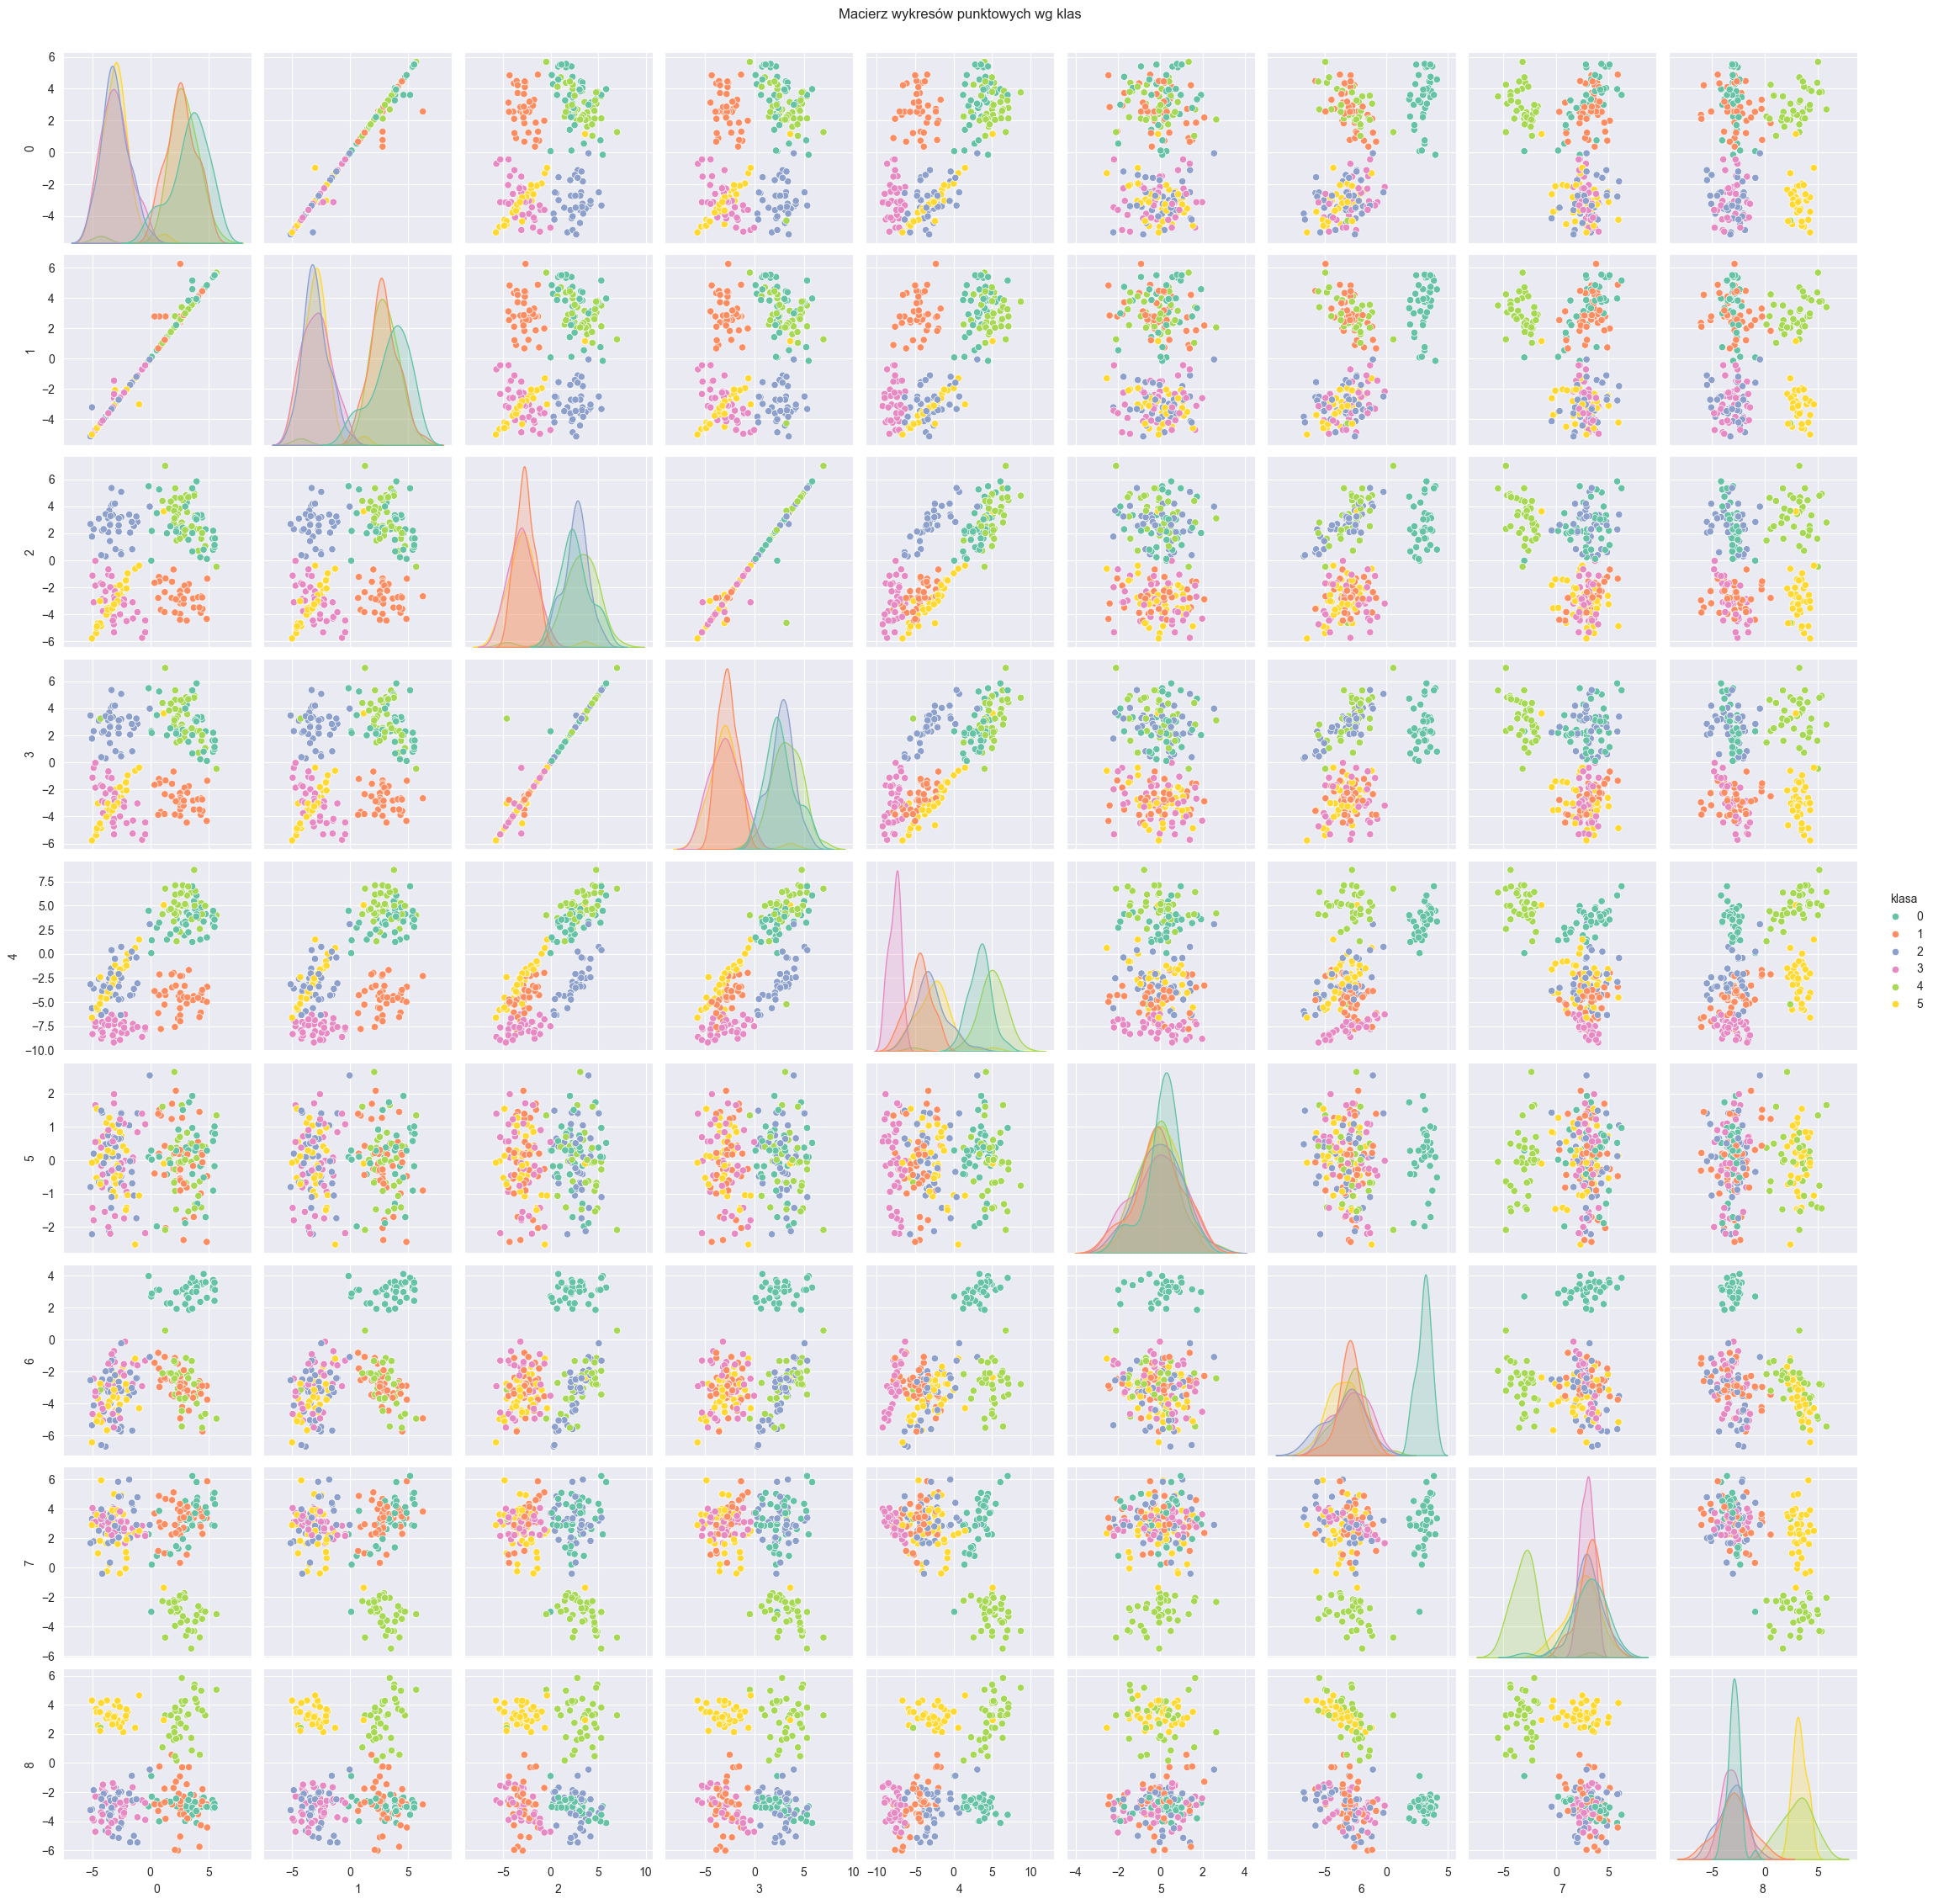

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = d_filled.columns.drop("klasa")

sns.pairplot(d_filled, vars=numeric_cols, hue="klasa", palette="Set2")
plt.suptitle("Macierz wykresów punktowych wg klas", y=1.01)
plt.show()

Po analizie powyższych wykresów można uznać, że atrybut decyzyjny nie odpowiada naturalnym skupieniom
danych w dwuwymiarowych przestrzeniach atrybutów.

## Macierz korelacji

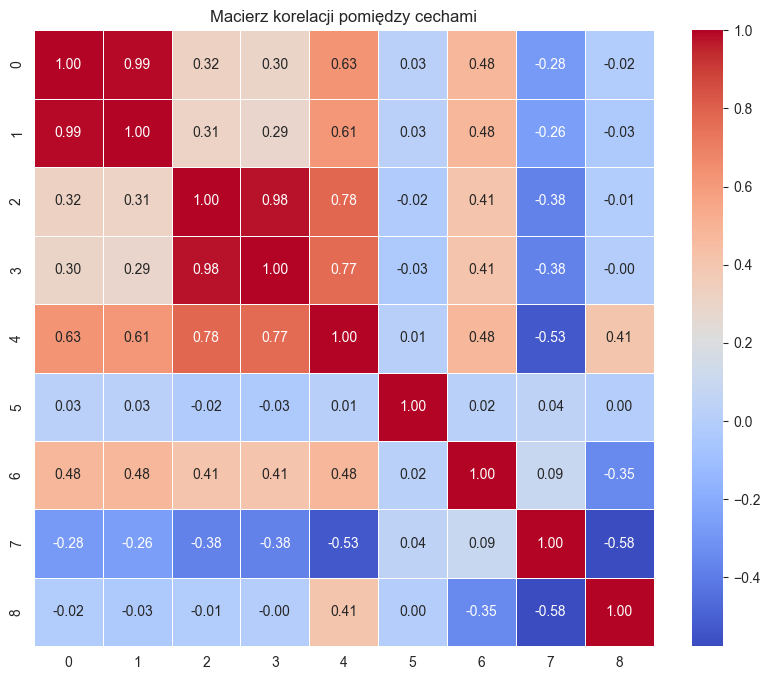

In [40]:
correlation_matrix = d_filled.drop(columns=["klasa"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji pomiędzy atrybutami")
plt.show()

In [41]:
correlation_matrix = d_filled.drop(columns=["klasa"]).corr()

corr_pairs_unique = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

corr_series = corr_pairs_unique.stack().sort_values(ascending=False)

print("Najsilniejsze dodatnie korelacje:")
print(corr_series.head(5))

print("\nNajsilniejsze ujemne korelacje:")
print(corr_series.tail(5))

Najsilniejsze dodatnie korelacje:
0  1    0.991702
2  3    0.980712
   4    0.779002
3  4    0.768864
0  4    0.626133
dtype: float64

Najsilniejsze ujemne korelacje:
6  8   -0.347850
2  7   -0.377884
3  7   -0.378083
4  7   -0.527365
7  8   -0.576255
dtype: float64


# 3 Ocena atrybutów do poprawnej klasyfikacji

Korzystając z wcześniej wygenerowanego wykresu korelacji atrybutów stwierdzam, że do poprawnej klasyfikacji nie należy wykorzystywać wszystkich atrybutów.
Założyłem, że atrybuty są skorelowane, jeżeli wartość korelacji jest większa niż 0,75 lub mniejsza niż -0,75.
W przypadku badanego zbioru danych z klasyfikacji wykluczone zostają atrybuty:
- 1
- 2
- 4

In [55]:
d_classification = d_filled.drop(columns=["1", "2", "4"])

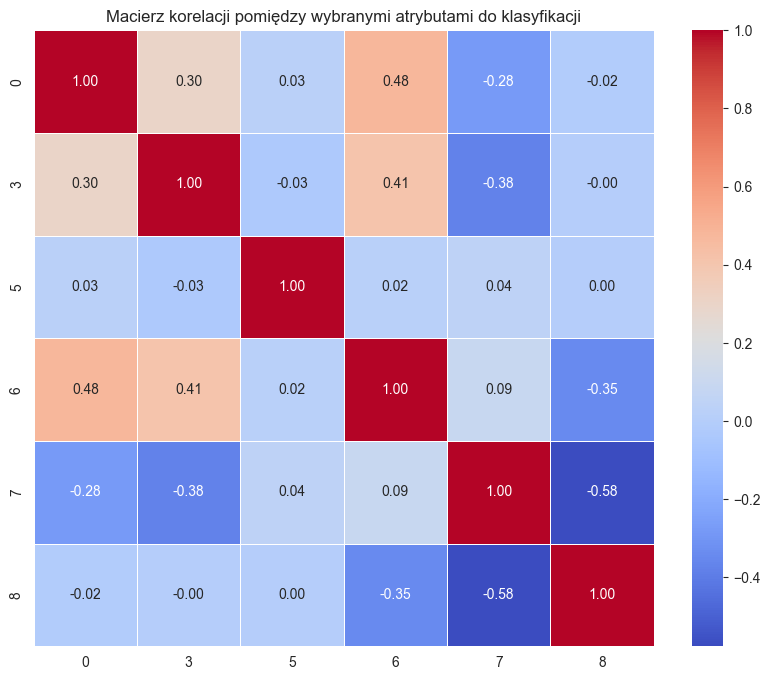

In [56]:
correlation_matrix_new = d_classification.drop(columns=["klasa"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji pomiędzy wybranymi atrybutami do klasyfikacji")
plt.show()

Wygenerowany zbiór danych nie ma już silnie skorelowanych atrybutów.

Teraz warto zastanowić się czy atrybuty wymagają normalizacji lub standaryzacji.

Statystyki przed standaryzacją:


mean       std       min       max
0 -0.015794  3.257100 -5.143208  5.682350
3 -0.011365  3.192297 -5.772597  6.982502
5 -0.036805  1.005526 -2.521316  2.644632
6 -2.065672  2.610957 -6.671241  4.104896
7  1.966345  2.589103 -5.499243  6.224215
8 -0.946576  3.113799 -5.998411  5.833186

Statystyki po standaryzacji:


mean       std       min       max
0 -2.896234e-18  1.002181 -1.577660  1.753269
3 -3.861645e-18  1.002181 -1.808665  2.195635
5 -2.196311e-17  1.002181 -2.476247  2.672516
6 -1.467425e-16  1.002181 -1.767786  2.368490
7 -4.730515e-17  1.002181 -2.889754  1.648122
8 -3.861645e-17  1.002181 -1.625941  2.182077

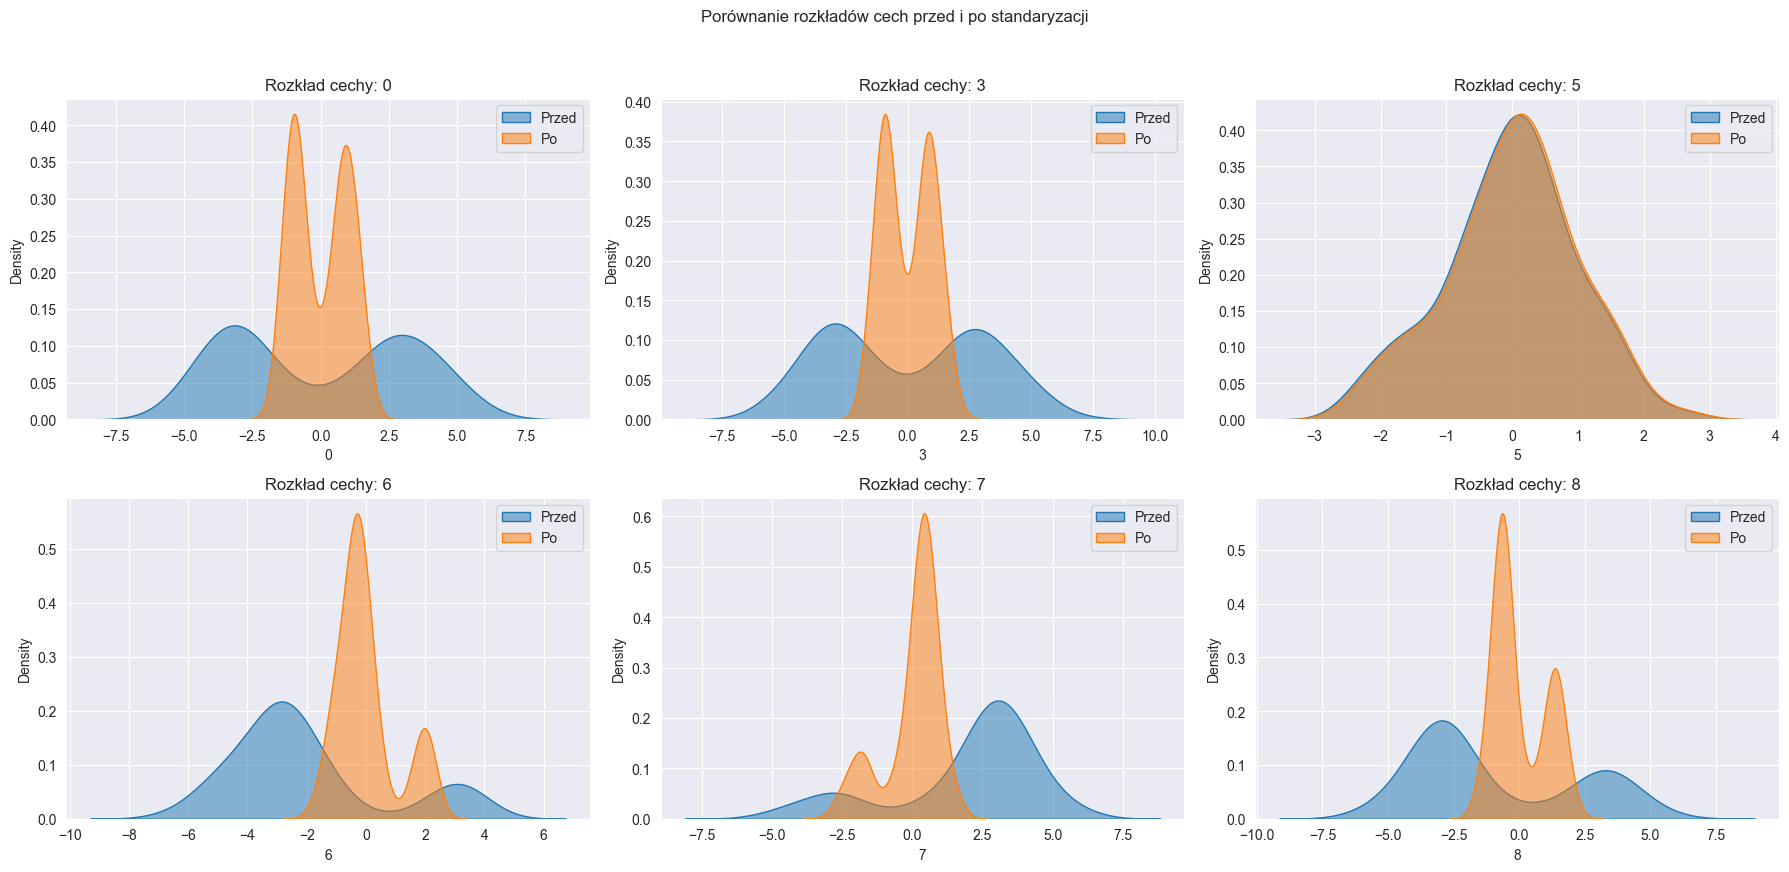

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

X = d_classification.drop(columns=["klasa"])
print("Statystyki przed standaryzacją:")
display(X.describe().T[["mean", "std", "min", "max"]])

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Statystyki po standaryzacji:")
display(X_scaled.describe().T[["mean", "std", "min", "max"]])


# 4. Porównanie histogramów cech: przed i po
plt.figure(figsize=(18, 12))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(X[col], label='Przed', fill=True, alpha=0.5)
    sns.kdeplot(X_scaled[col], label='Po', fill=True, alpha=0.5)
    plt.title(f"Rozkład cechy: {col}")
    plt.legend()
plt.suptitle("Porównanie rozkładów cech przed i po standaryzacji", y=1.02)
plt.tight_layout()
plt.show()

Aby zobaczyć sens powyższych operacji można przedstawić ponownie macierz wykresów punktowych


# to do wywalenia

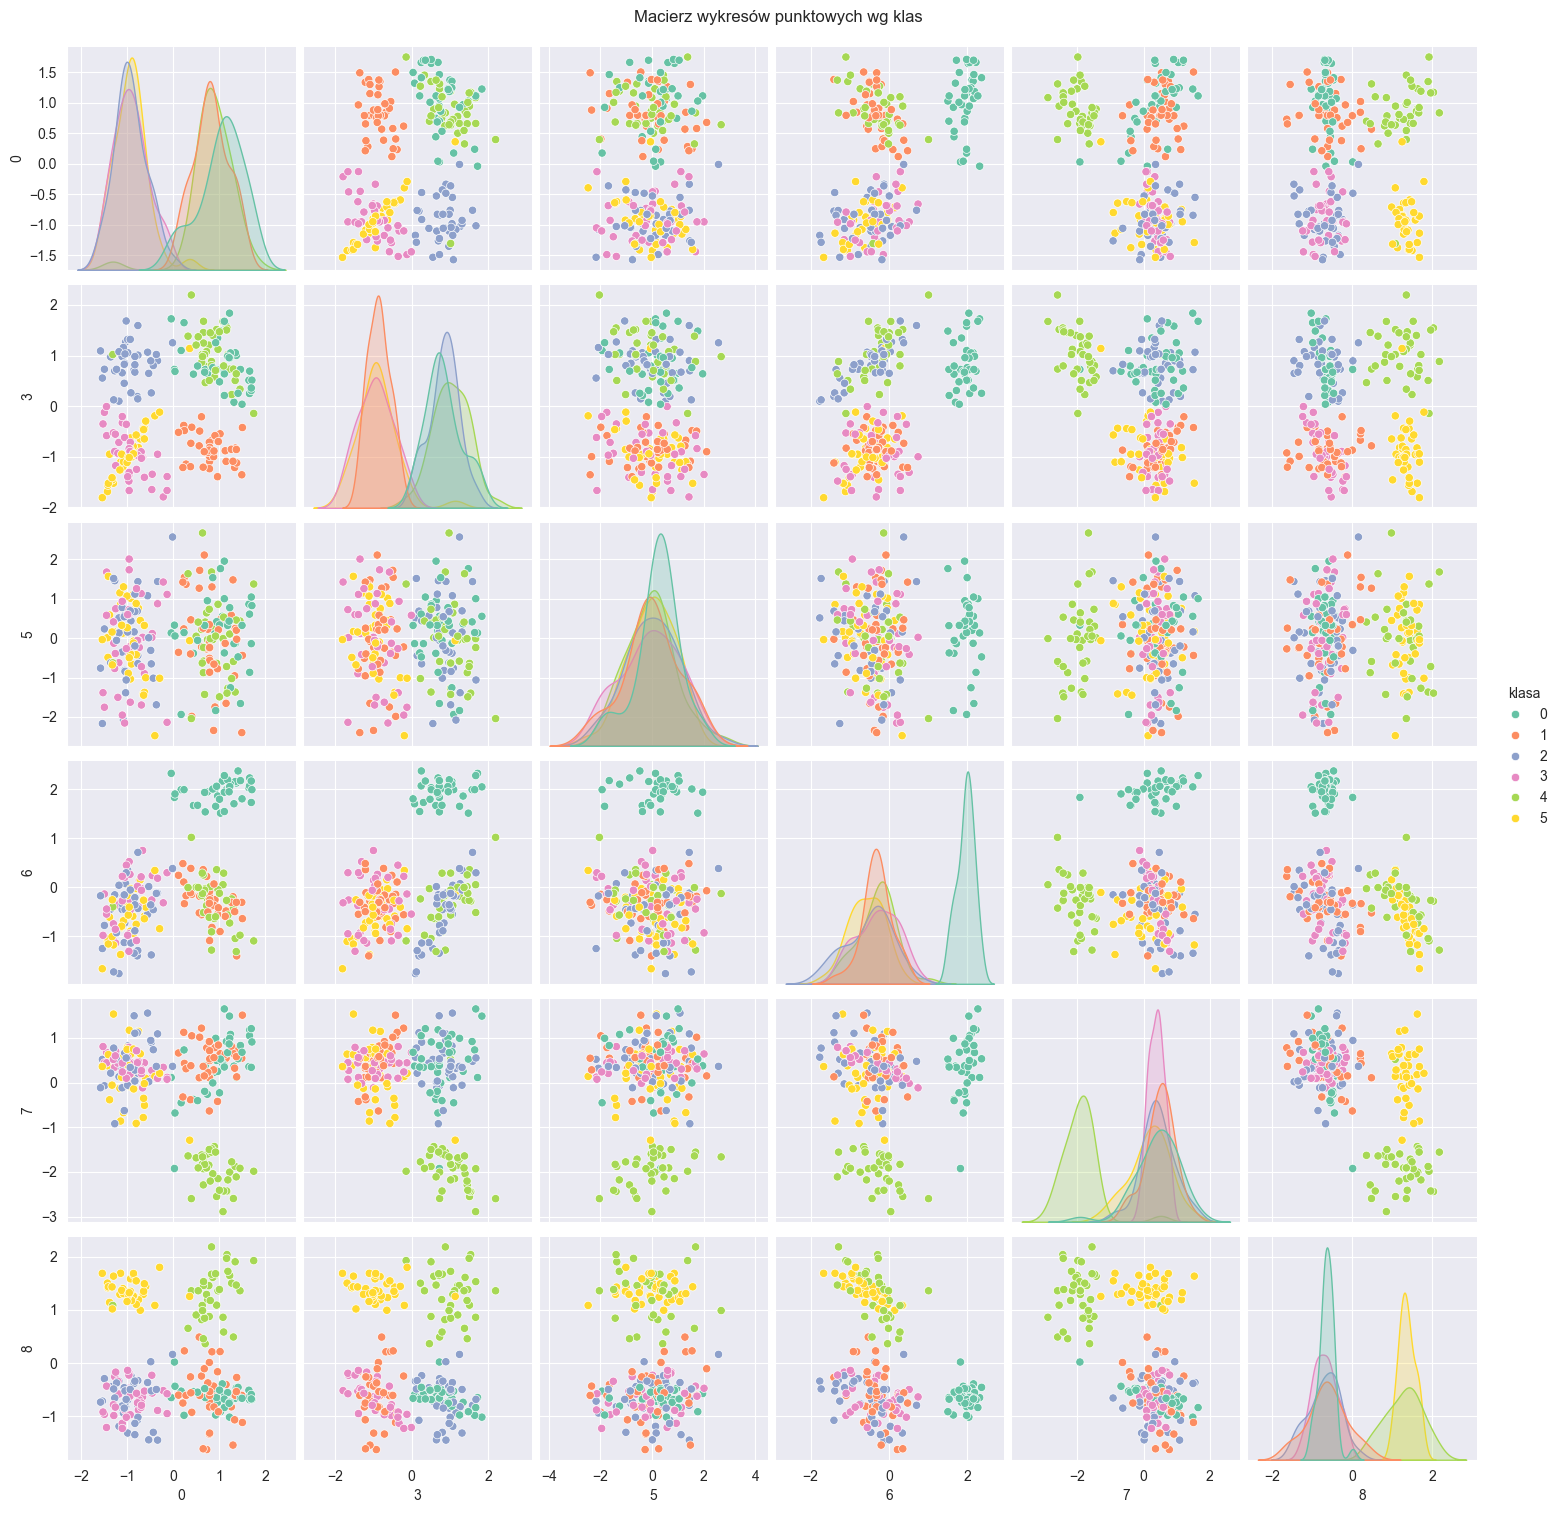

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

X_scaled_with_class = X_scaled.copy()
X_scaled_with_class["klasa"] = d_filled["klasa"].values

numeric_cols = X_scaled_with_class.columns.drop("klasa")

sns.pairplot(X_scaled_with_class, vars=numeric_cols, hue="klasa", palette="Set2")
plt.suptitle("Macierz wykresów punktowych wg klas", y=1.01)
plt.show()

# 4. Test poznanych klasyfikatorów

Zaimportowane zostają procedury niezbędne do realizacji zadań klasyfikacji z pakietu `scikit-learn`

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

**Materiał zainspirowany zadaniami laboratoryjnymi**

Dla sprawdzenia działania klasyfikatorów, należy podzielić zbiór danych na uczący i testowy. W tym celu wykorzystuje się funkcję `train_test_split`. Funkcja ta zarówno na wejściu jak i na wyjściu wymaga podania osobno atrybutów opisujących i atrybutu decyzyjnego. Taki sposób reprezentacji będzie wykorzystywany dalej przez funkcje realizujące zadania klasyfikacji. Dla ułatwienia przygotowana została funkcja realizująca podział zbioru i zapisująca zbiór uczący i testowy w jednej strukturze (słowniku).

In [169]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

dane = podziel(X_scaled_with_class,0.3)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  161
Liczba obiektów zbioru testowego:  69


**Materiał zainspirowany zadaniami laboratoryjnymi**

Jakość klasyfikacji będę oceniać przy pomocy **macierzy pomyłek** (zwanej także macierzą kontyngencji lub tabelą krzyżową).

Procedura `weryfikuj` wyświetla macierze pomyłek dla obu zbiorów.

In [170]:
def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(d['opis_ucz'],d['dec_ucz']))
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(d['opis_test'],d['dec_test']))
    print(mp)

## 4.1 Klasyfikator najbliższego sąsiada

In [171]:
# podział zbioru danych
d = podziel(X_scaled_with_class,0.3)
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=1)
# weryfikacja
weryfikuj(model,d,[0,1,2,3,4,5])

macierz pomyłek - zbiór uczący, dokładność: 1.0
1.0
[[26  0  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 28  0]
 [ 0  0  0  0  0 25]]
macierz pomyłek - zbiór testowy, dokładność: 0.9565217391304348
0.9565217391304348
[[13  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 11  1  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  1  0  8  1]
 [ 0  0  0  0  0 13]]


## 4.2 Klasyfikator $k$-najbliższych sąsiadów (k-NN)

In [172]:
# podział zbioru danych
d = podziel(X_scaled_with_class,0.3)


for k in [3,5,9,12]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    print("Model", k, "Neighbors")
    weryfikuj(model_knn,d,[0,1,2,3,4,5])

Model 3 Neighbors
macierz pomyłek - zbiór uczący, dokładność: 0.9813664596273292
0.9813664596273292
[[21  0  0  0  0  0]
 [ 0 27  0  1  0  0]
 [ 0  0 32  0  0  0]
 [ 0  0  0 27  0  0]
 [ 0  0  1  0 26  0]
 [ 0  0  0  0  1 25]]
macierz pomyłek - zbiór testowy, dokładność: 1.0
1.0
[[18  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 12]]
Model 5 Neighbors
macierz pomyłek - zbiór uczący, dokładność: 0.968944099378882
0.968944099378882
[[21  0  0  0  0  0]
 [ 0 26  0  2  0  0]
 [ 0  0 32  0  0  0]
 [ 0  1  0 26  0  0]
 [ 0  0  1  0 26  0]
 [ 0  0  0  0  1 25]]
macierz pomyłek - zbiór testowy, dokładność: 1.0
1.0
[[18  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 12]]
Model 9 Neighbors
macierz pomyłek - zbiór uczący, dokładność: 0.9813664596273292
0.9813664596273292
[[21  0  0  0  0  0]
 [ 0 28  0  0  0  0]
 [ 0  0 32  0  0  0]
 [ 0  0  1 26  0  0]
 [ 0

## 4.3 Klasyfikator najbliższych prototypów

In [198]:
# podział zbioru danych
d = podziel(X_scaled_with_class,0.3)

model = NearestCentroid()

weryfikuj(model,d,[0,1,2,3,4,5])

macierz pomyłek - zbiór uczący, dokładność: 0.9875776397515528
0.9875776397515528
[[27  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 28  0  0  0]
 [ 0  0  1 25  0  0]
 [ 0  0  1  0 23  0]
 [ 0  0  0  0  0 24]]
macierz pomyłek - zbiór testowy, dokładność: 0.9855072463768116
0.9855072463768116
[[12  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  1 13]]


## 4.4 Naiwny klasyfikator Bayesa

In [249]:
# podział zbioru danych
d = podziel(X_scaled_with_class,0.3)

model = GaussianNB()

weryfikuj(model,d,[0,1,2,3,4,5])

macierz pomyłek - zbiór uczący, dokładność: 0.9875776397515528
0.9875776397515528
[[25  0  0  0  0  0]
 [ 0 26  0  0  0  0]
 [ 0  0 29  0  0  0]
 [ 0  0  1 29  0  0]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  1 27]]
macierz pomyłek - zbiór testowy, dokładność: 0.9855072463768116
0.9855072463768116
[[14  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 14  1]
 [ 0  0  0  0  0 10]]


## 4.5 Drzewo decyzyjne

In [230]:
# podział zbioru danych
d = podziel(X_scaled_with_class,0.3)

model = tree.DecisionTreeClassifier(max_depth=6)

weryfikuj(model,d,[0,1,2,3,4,5])

macierz pomyłek - zbiór uczący, dokładność: 1.0
1.0
[[29  0  0  0  0  0]
 [ 0 34  0  0  0  0]
 [ 0  0 23  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 26  0]
 [ 0  0  0  0  0 28]]
macierz pomyłek - zbiór testowy, dokładność: 0.9565217391304348
0.9565217391304348
[[10  0  0  0  0  0]
 [ 0  4  0  0  1  0]
 [ 0  0 15  0  0  0]
 [ 0  0  1 16  0  0]
 [ 0  0  0  0 11  1]
 [ 0  0  0  0  0 10]]


Dodatkowo możemy pokazać również zasady, kórymi kieruje się wytrenowany model podczas klasyfikacji obiektu

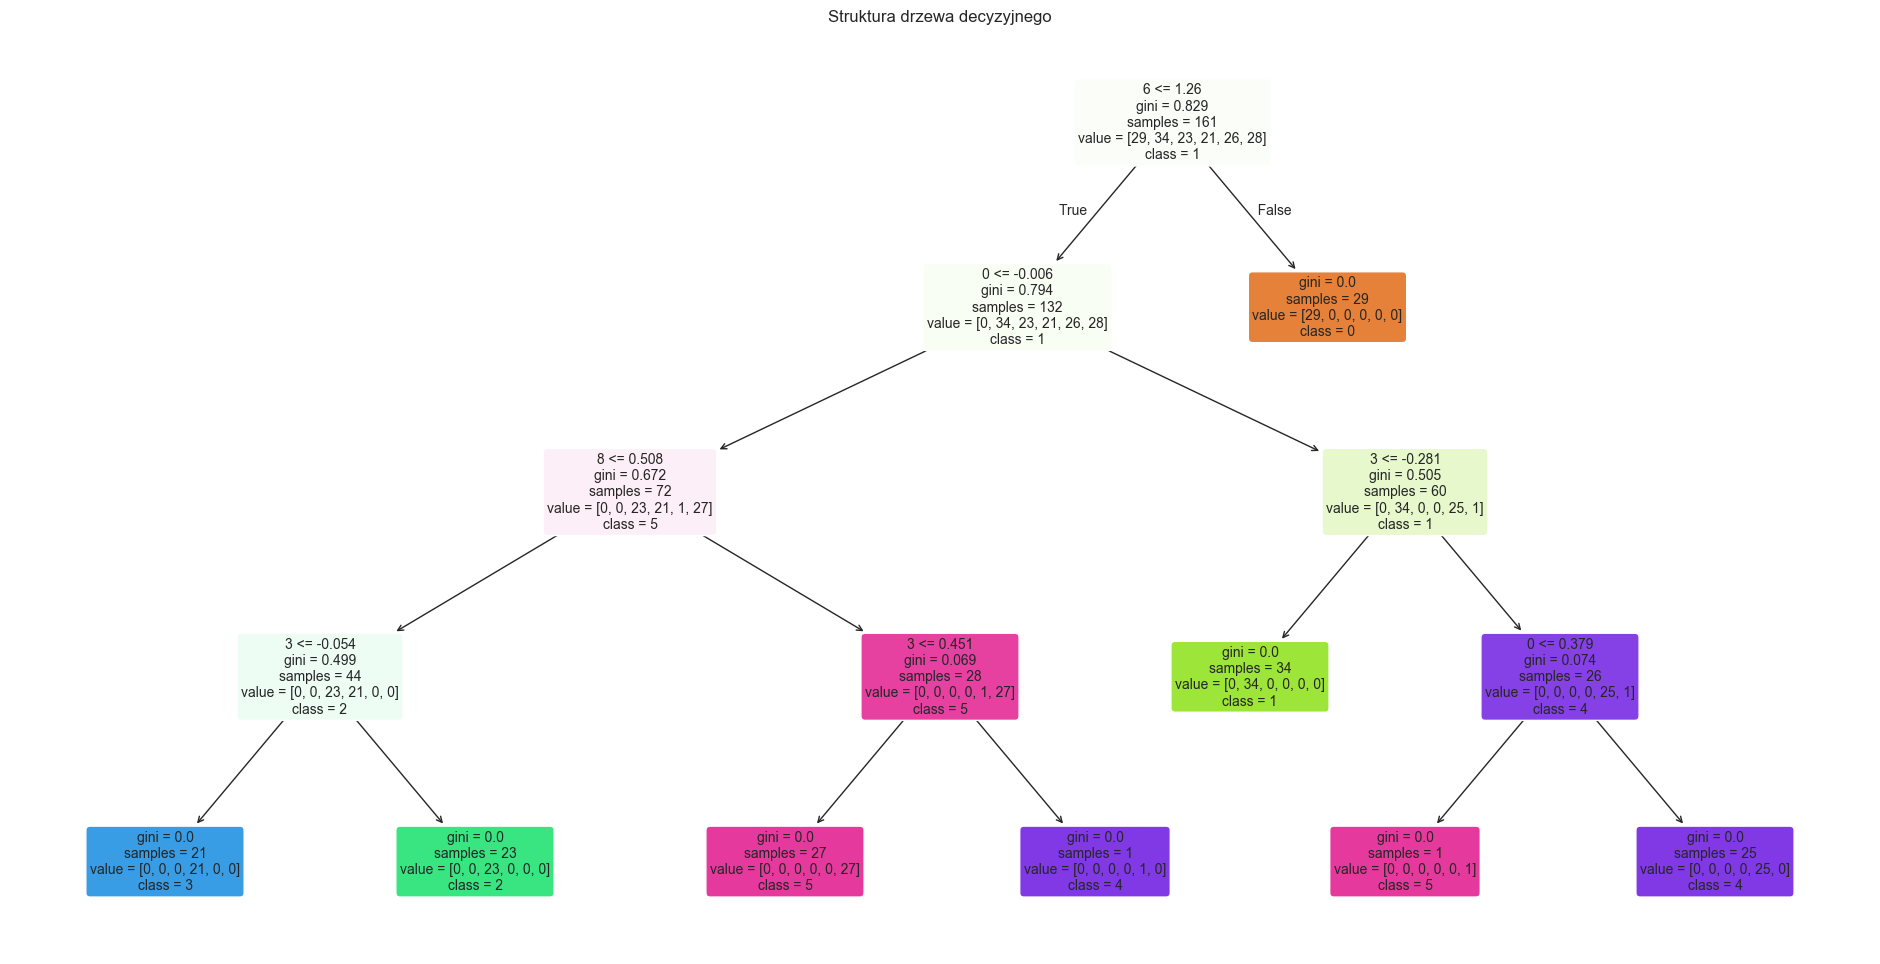

In [232]:
plt.figure(figsize=(24, 12))
tree.plot_tree(model,
               feature_names=d["opis_ucz"].columns,
               class_names=[str(i) for i in sorted(d["dec_ucz"].unique())],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Struktura drzewa decyzyjnego")
plt.show()

## Podsumowanie testów wybranych klasyfikatorów

Testy klasyfikatorów na danych z usuniętymi skorelowanymi atrybutami oraz przeprowadzonej standaryzacji okazały się zbliżone pod względem swojej dokładności przy klasyfikowaniu obiektów testowych.

Oczywiście w przypadku modelu drzewa decyzyjnego atrybut maksymalnej głębokości drzewa miał wpływ na skuteczność klasyfikacji. To samo tyczy się modelu k-najbliższych sąsiadów.

Przy kilku uruchomieniach tego samego modelu, wyniki dokładności różniły się od siebie. Zapewne spowodowane to było innym podziałem zbioru danych na dane testowe i treningowe ,co przekładało się na nieznaczną zmianę dokładności takiego samego modelu, gdy w zbiorze testowym znalazły się mniej 'standardowe' obiekty danej klasy. Niemniej jednak w każdym przypadku model osiągał dokładność na poziomie 95%-100% co jest bardzo dobrym wynikiem.

W takiej sytuacji jest mi ciężko wskazać najlepszy klasyfikator, jednak jeśli miałbym wdrożyć jeden z przetestowanych modeli byłby to model naiwnego klasyfikatora Bayesa.
Kierowałbym się jego prostotą, szybkością w trenowaniu i klasyfikacji.

# 5 Grupowanie

## Generuje macierze wykresów punkowych według podziału klas stworzonego przez algorytm k-średnich dla kilku wybranych wartości k


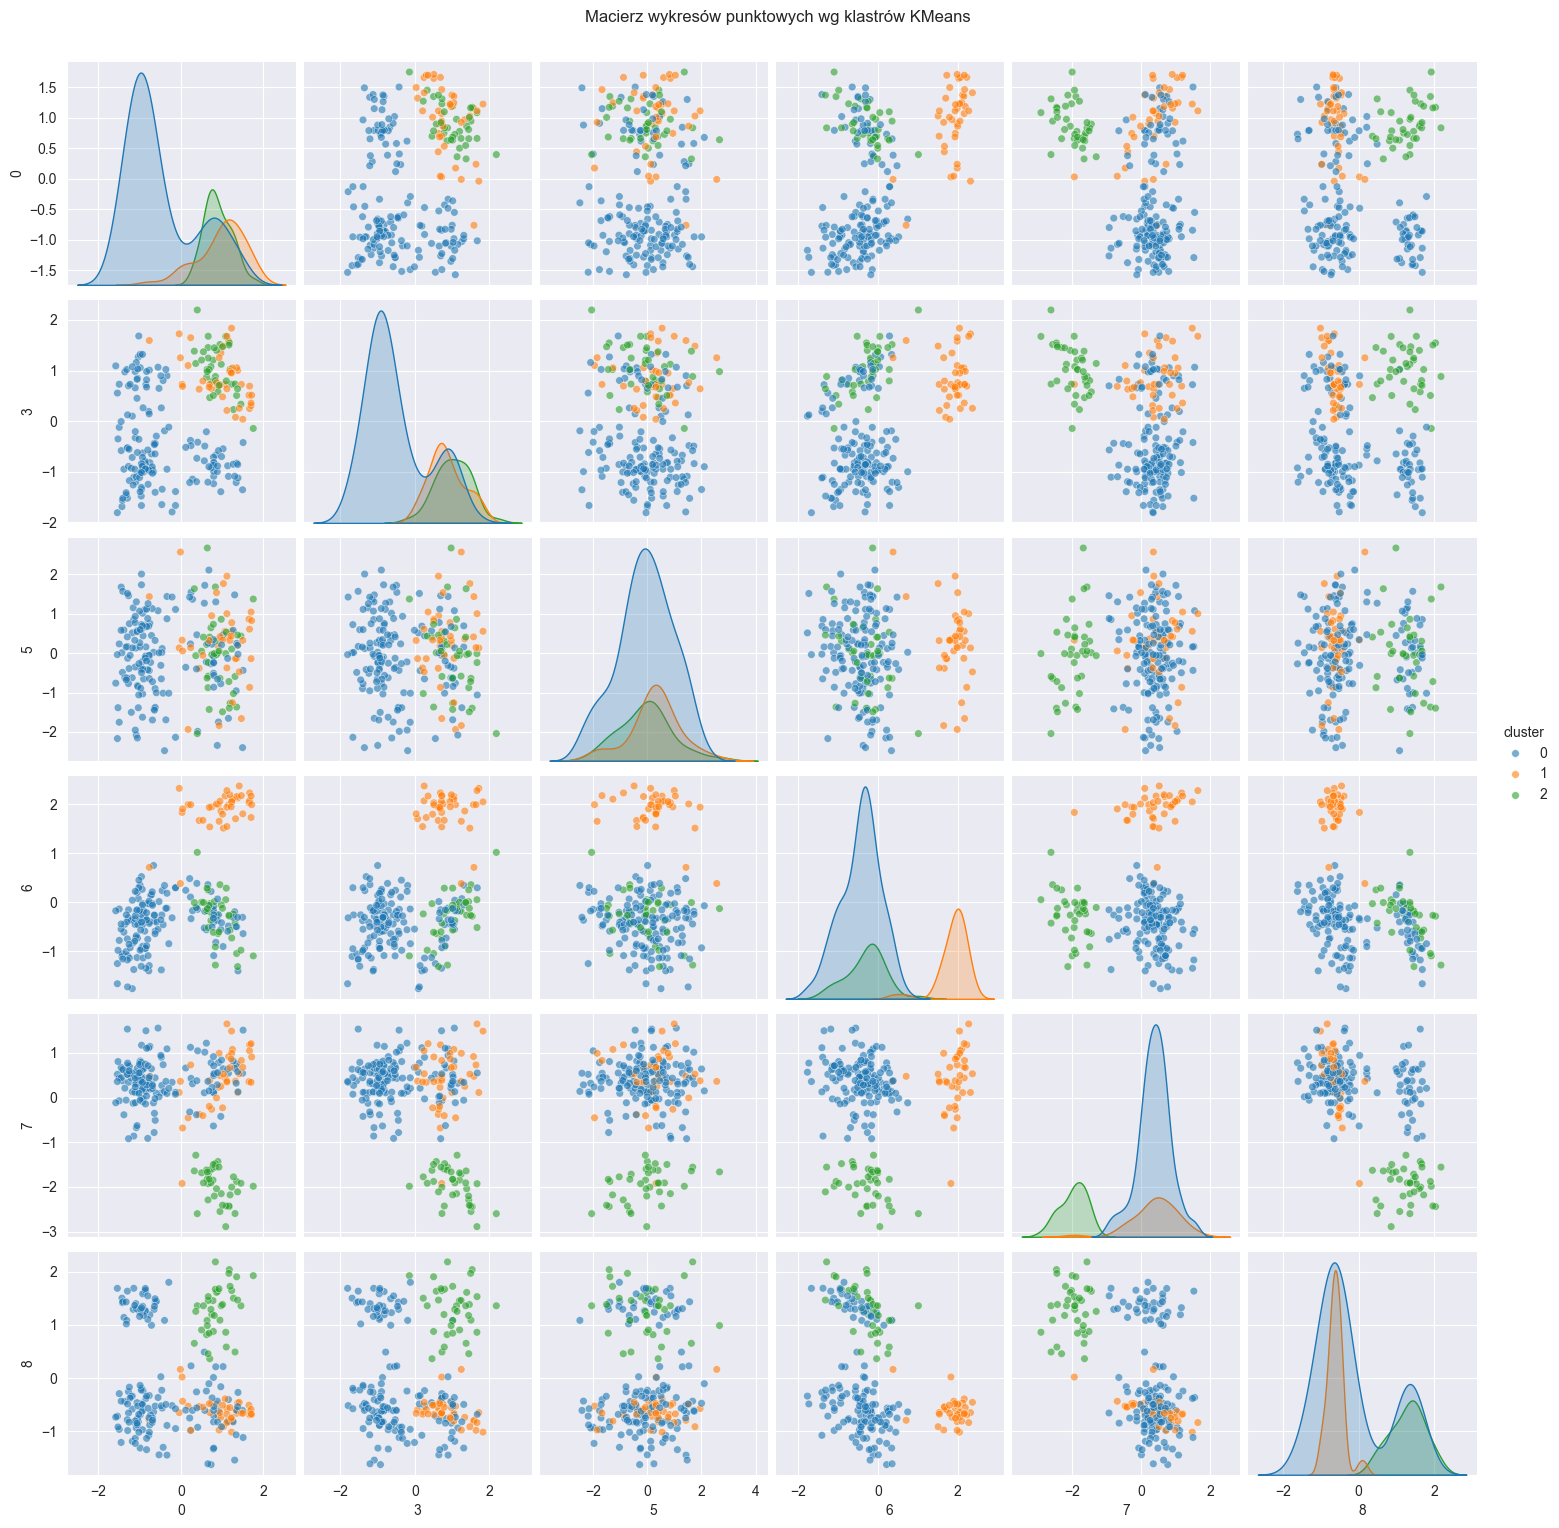

In [273]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Dodanie etykiety klastra do danych
X_clustered = X_scaled.copy()
X_clustered["cluster"] = cluster_labels

# Pairplot z kolorami wg przypisanych klastrów (zamiast klas)
sns.pairplot(X_clustered,
             hue="cluster",
             palette="tab10",
             diag_kind="kde",
             plot_kws={"alpha": 0.6, "s": 30})

plt.suptitle("Macierz wykresów punktowych wg klastrów KMeans", y=1.02)
plt.show()

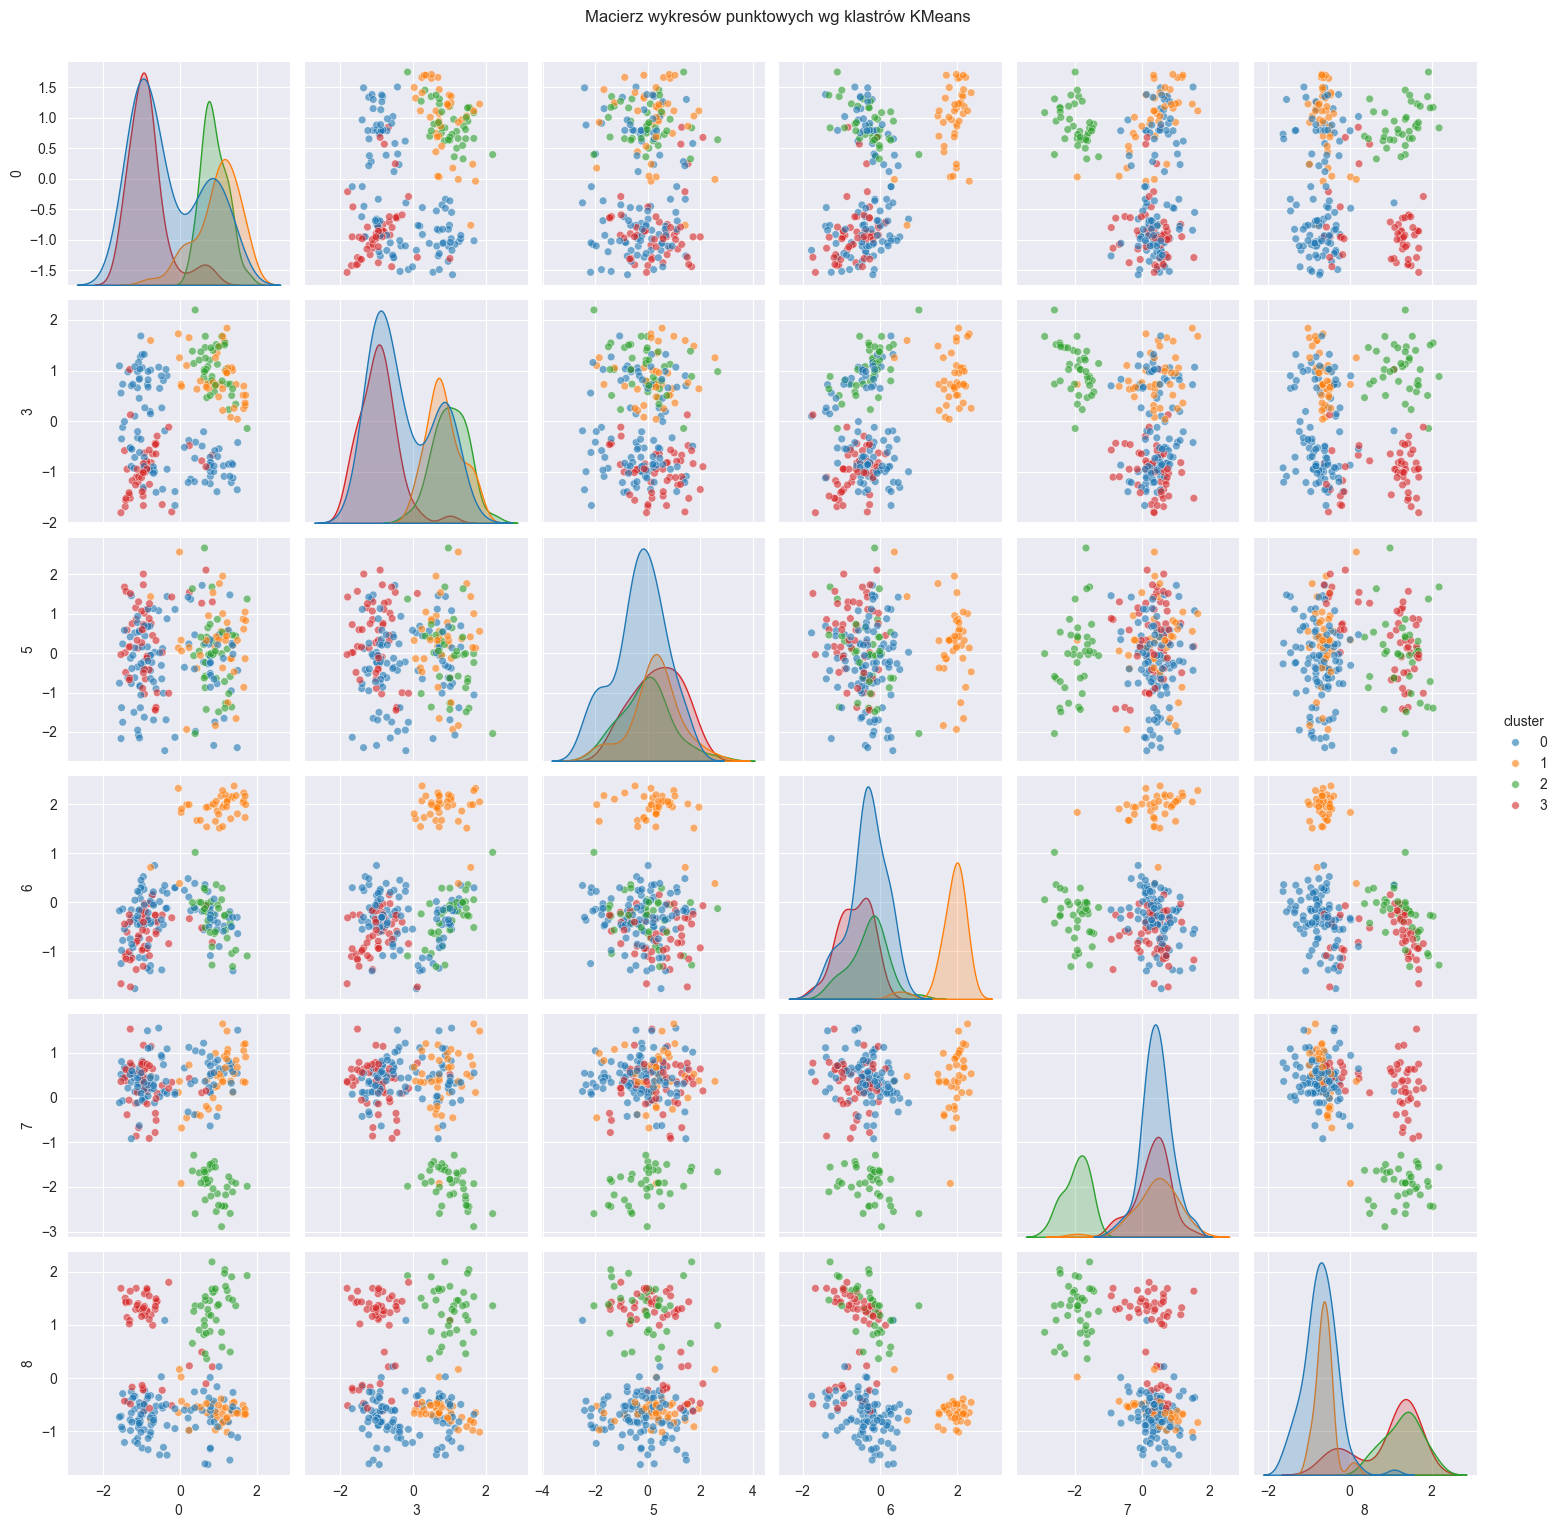

In [268]:
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Dodanie etykiety klastra do danych
X_clustered = X_scaled.copy()
X_clustered["cluster"] = cluster_labels

# Pairplot z kolorami wg przypisanych klastrów (zamiast klas)
sns.pairplot(X_clustered,
             hue="cluster",
             palette="tab10",
             diag_kind="kde",
             plot_kws={"alpha": 0.6, "s": 30})

plt.suptitle("Macierz wykresów punktowych wg klastrów KMeans", y=1.02)
plt.show()

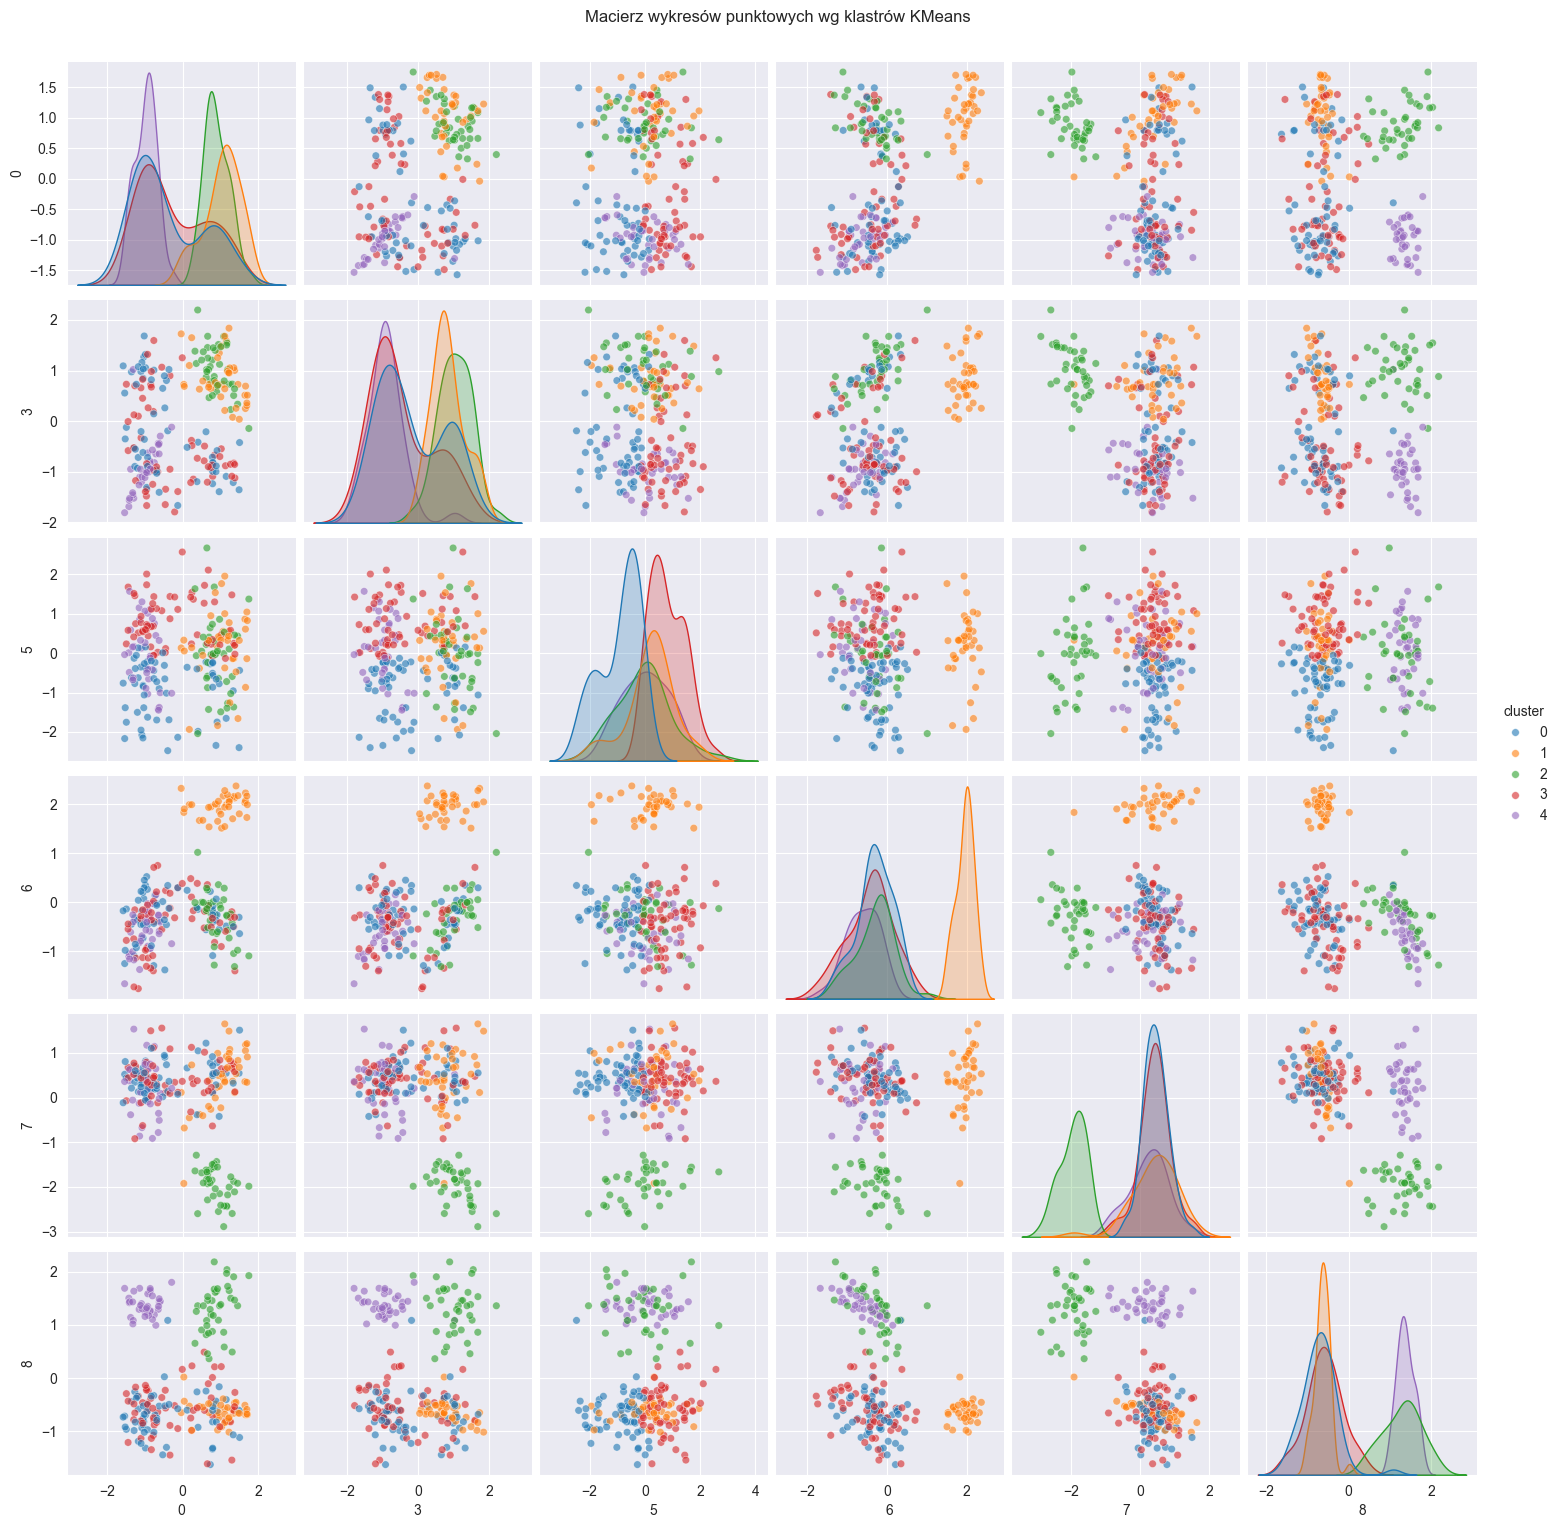

In [269]:
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Dodanie etykiety klastra do danych
X_clustered = X_scaled.copy()
X_clustered["cluster"] = cluster_labels

# Pairplot z kolorami wg przypisanych klastrów (zamiast klas)
sns.pairplot(X_clustered,
             hue="cluster",
             palette="tab10",
             diag_kind="kde",
             plot_kws={"alpha": 0.6, "s": 30})

plt.suptitle("Macierz wykresów punktowych wg klastrów KMeans", y=1.02)
plt.show()

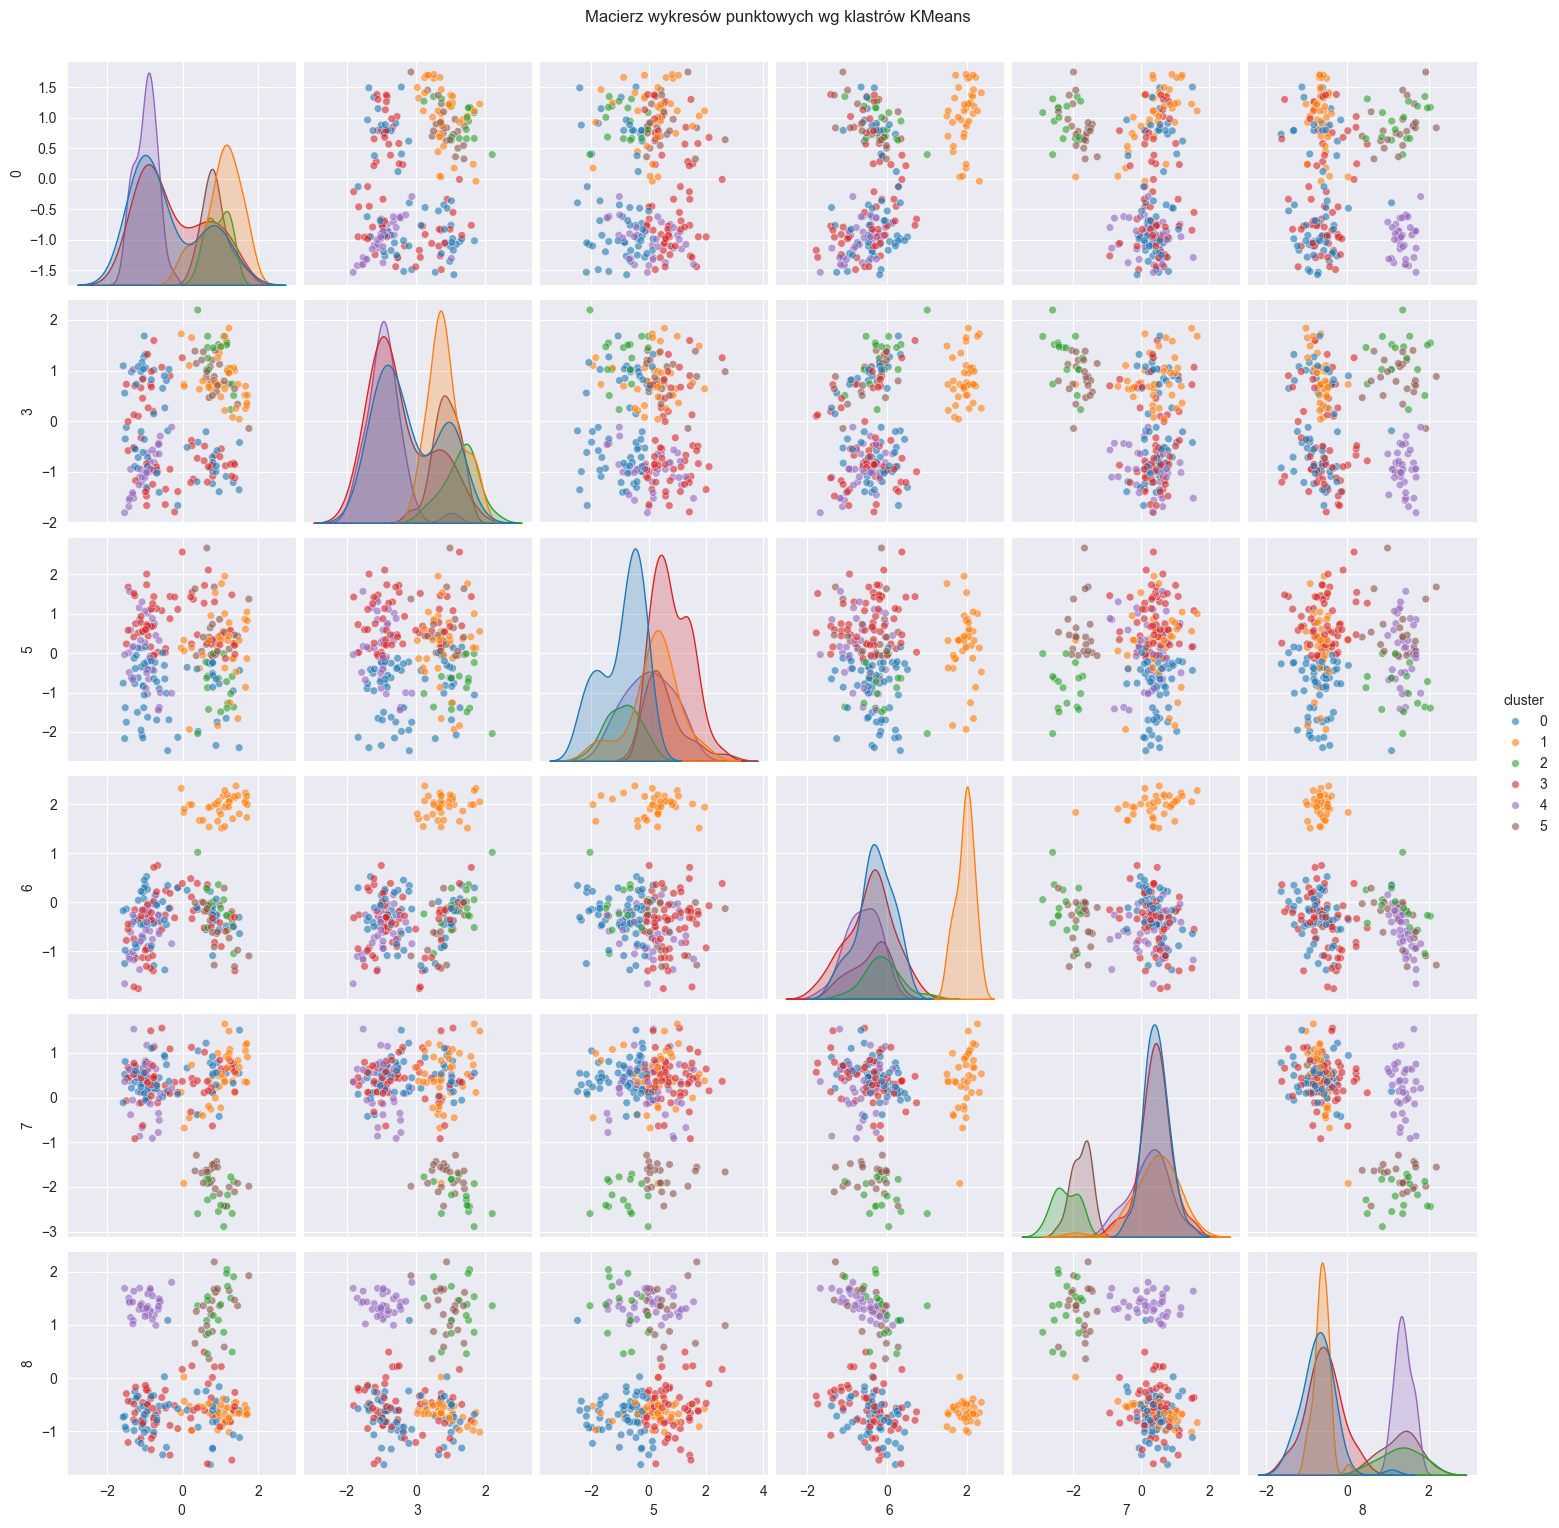

In [270]:
kmeans = KMeans(n_clusters=6, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Dodanie etykiety klastra do danych
X_clustered = X_scaled.copy()
X_clustered["cluster"] = cluster_labels

# Pairplot z kolorami wg przypisanych klastrów (zamiast klas)
sns.pairplot(X_clustered,
             hue="cluster",
             palette="tab10",
             diag_kind="kde",
             plot_kws={"alpha": 0.6, "s": 30})

plt.suptitle("Macierz wykresów punktowych wg klastrów KMeans", y=1.02)
plt.show()

## Przedstawienie metody łokciowej dla k z zakresu 2-10

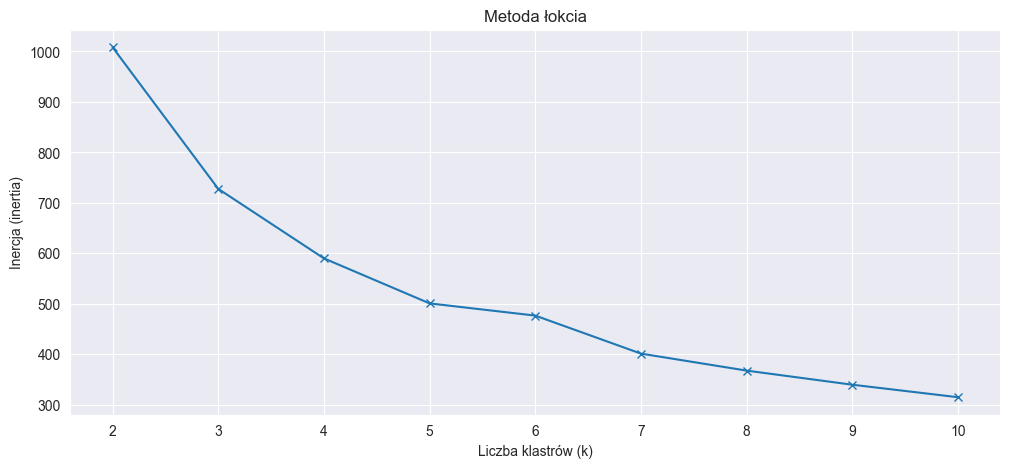

In [271]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dane bez kolumny 'klasa'
X_clustering = X_scaled.copy()

# 1. Metoda łokcia – ocena optymalnej liczby klastrów
inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_clustering, kmeans.labels_))

# 2. Wizualizacja: wykres łokciowy
plt.figure(figsize=(12, 5))


plt.plot(K_range, inertia, marker='x')
plt.title("Metoda łokcia")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Inercja (inertia)")
plt.show()

Jak widać po wykresach macierzy wykresów punktowych dla różnych wartości k oraz analizie metody łokciowej dane nie odpowiadają naturalnym skupieniom w przestrzeni atrybutów. Metoda łokciowa nie ma 'widocznego zgięcia łokcia', który wskazywałby na optymalną liczbę klas.

Wnioski otrzymane w punkcie 2 są zgodne z analizą w tym punkcie.